The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University

# Chapter 3. 넘파이$^{NumPy}$ 튜토리얼(1/3)

## 학습 목표
    - 기계학습에서 왜 넘파이를 사용하는지 이해한다
    - 넘파이 개념과 기본적인 사용법을 익힌다.

## 학습 내용
1. 넘파이의 특징
2. 왜 넘파이인가? 
3. 배열의 속성
4. 배열의 생성과 출력

## 1. 넘파이의 특징
NumPy는 '넘파이'라고 읽고, NumPy쓰는 것이 정석입니다. 파이썬 기반 데이터 분석 환경에서 넘파이는 행렬 연산을 위한 핵심 라이브러리입니다. NumPy는 “Numerical Python“의 약자로 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공합니다. 

파이썬 리스트(list) 클래스를 개선하여 만든 넘파이의 `ndarray` 클래스를 사용하면 더 많은 데이터를 더 빠르게 처리할 수 있습니다. 메모리 버퍼에 배열 데이터를 저장하고 처리하는 효율적인 인터페이스를 제공합니다. 

NumPy는 다음과 같이 기계학습를 구현하는데 상당히 유용한 특징을 갖고 있습니다.

- 강력한 N 차원 배열 객체
- 정교한 브로드케스팅(Broadcast) 기능
- 다양한 선형 대수학 함수와 난수 기능
- 범용적 데이터 처리에 사용 가능한 다차원 컨테이너
- C/C ++ 및 Fortran 코드 통합 도구

파이썬에서 NumPy를 사용할 때, 다음과 같이 numpy 모듈을 “np”로 임포트하여 사용합니다. np로 임포트 하지 않으면, numpy를 사용해야 합니다. Numpy 라이브러리 버전은 다음과 같이 확인 할 수 있습니다.

In [ ]:
import numpy
None.__version__

In [ ]:
import numpy as np
None.__version__

## 2. 왜 넘파이인가?

### 2.1 파이썬 리스트 복습하기

넘파이를 실습하기 전에 넘파이 배열과 비슷한 파이썬 리스트를 먼저 복습해봅니다. 다음은 3개의 숫자와 하나의 문자열로 구성된 파이썬 리스트입니다.

In [ ]:
alist = [10, 20, 'aim high', 30] 
print(alist)
print(alist[2])

리스트는 다른 리스트를 요소로 포함할 수 있습니다. 이렇게 중첩된 배열을 2차원 배열이라고 합니다. 예를 들면, 다음과 같이 만들 수 있습니다. 다만, 배열(array)이라고 할 때는 같은 형식(type)의 자료만으로 요소를 구성해야 합니다.  

In [ ]:
alist = [[10, 20, 30], [50, 60, 70]]

이 리스트의 크기는 `2 x 3`(two by three)라고 말합니다. 또는 2개의 행과 3개의 열이 있다고 말합니다. 그리고, 배열의 요소를 선택할 때는 대괄호를 사용합니다. 예를 들어 두 번째 행의 세 번째 열을 선택하면, 70이 출력이 되어야 합니다. 인덱스는 0부터 시작합니다.  

In [ ]:
print(alist[1][2])

다차원 배열을 파이썬 리스트로 만들어 사용해도 되지만, 파이썬 리스트로 만든 배열은 배열의 크기가 커질수록 성능이 떨어지는 단점이 있습니다. 넘파이를 사용하면, 이런 성능의 문제가 많이 해결이 됩니다. 예를 들어, 파이썬 리스트의 요소를 모두 더하려면 for 문을 만들어야 합니다. 

넘파이에서는 배열에 관한 다양한 함수를 제공하기 때문에 반복문을 사용하지 않고도 배열의 합을 계산할 수 있습니다. sum() 함수는 배열의 요소를 모두 더해 주는 함수입니다. 

In [ ]:
# compute sum of allist 

sum = 0
for row in alist:
    for x in row:
        sum += x
print(sum)

In [ ]:
# convert a list type to ndarray type
# compute sum of ndarray

ndarr = np.array(alist)
sum = np.sum(ndarr)
print(sum)

위의 넘파이 함수의 방법은 반복문을 사용하는 것보다 간편합니다. 

### 2.2 넘파이의 연산속도

넘파이를 사용하면, 다차원 행렬 연산을 손쉽게 할 수 있습니다. 특히, 앞으로 살펴볼 신경망에서 가중치를 계산하게 될 것입니다. 신경망이 복잡해지고 수행해야할 연산이 많아질수록 넘파이를 사용한 연산이 빛을 발하게 됩니다. 하나의 예제를 통해 행렬 연산을 사용해야 하는 이유를 보여드리겠습니다.

다음 셀에서는 일백만개의 가중치 w와 입력값 x를 초기화합니다. 그리고, 
1. 한 경우는 파이썬 리스트 형식의 w, x에 값을 저장하고, 또
2. 한 경우는 넘파이 배열 형식의 w_np, x_np에 저장합니다.

In [ ]:
import numpy as np

n = 10000000
w = []                # list type
x = []
for i in range(n):
    w.append(1.1)
    x.append(1.0000001)

w_np = np.array(w)
x_np = np.array(x)

In [ ]:
len(w)
len(w_np)

다음 두 셀은 각각의 데이터 구조에 저장된 입력과 가중치를 곱한 값, 즉 $wx$ 의 연산 속도를 보여줍니다. 

주피터 노트북의 셀 매직 커맨드인 `%%timeit`은 해당 셀을 수행하는데 사용된 시간을 보여줍니다. `time` 커맨드에 대한 자세한 설명은 [링크]( http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time)를 통해 확인할 수 있습니다. 

In [ ]:
%%timeit
total = 0
for i in range(n):
    total += w[i] * x[i]

In [ ]:
print(total)

다음 코드 셀의 None을 적절한 키워드로 대체하십시오. 

In [ ]:
%%timeit
total_np = np.dot(w_np, x_np)

In [ ]:
print(total_np)

여러분의 컴퓨터 CPU 사양에 따라서 연산속도에는 차이가 있을 것입니다. 제가 사용하는 노트북의 환경에서는 넘파이를 사용한 연산이 비교할 수 없는 정도로 빠르다는것을 확일할 수 있습니다. 그 이유는 기존의 파이썬 리스트를 사용해서 연산을 할 경우 for 반복문이 한줄 한줄 실행되는 반면에, 넘파이 어레이를 사용할 경우 동시에 다양한 연산을 할 수 있기 때문입니다.

자, 그러면, 우리가 넘파이를 열공할 이유가 충분한가요?  넘파이 배열의 속성부터 알아보도록 하겠습니다. 

## 3. 넘파이 배열 속성 

### 3.1 shape, rank, axis, ndim, size

넘파이 배열은 `ndarray` 클래스입니다. `ndarray` 클래스는 다음과 같은 속성이 있습니다. 

- ndim -- 차원, 축(axis)의 개수. 축의 갯수를 랭크(rank)라 부릅니다. (그림 1)에서 3D배열은 랭크가 3입니다.
- shape -- 크기 혹은 형상, 각 차원에서 배열의 사이즈를 표시하는 튜플입니다. n 행과 m 열을 갖는 매트릭스를 예를들면 shape 은 (n,m) 입니다. shape튜플의 길이는 랭크입니다. (그림 1)에서 3D배열의 형상은 (2, 2, 3)
- size -- 배열의 모든 원소(요소)들의 개수입니다. shape의 원소들의 모두 곱한 값과 같습니다. (그림 1)에서 3D배열의 크기는 12입니다.
- dtype -- 배열 원소들의 자료 형식, 예를 들면 numpy.int32, numpy.int16, and numpy.float64 입니다. 다음 표에 나열된 것처럼 "dtype prefix"로 시작하는 문자열이고, 이 글자 뒤에 오는 숫자는 바이트의 수를 의미합니다. 예를 들면 i8은 8바이트 int를 뜻합니다. U4는 유니코드 4글자 유니코드 문자열을 뜻합니다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지저합니다.

이러한 속성들을 다음과 같이 출력해볼 수도 있습니다. 

In [ ]:
def pprint(arr):
    print("type:{}, size:{}".format(type(arr), arr.size))
    print("shape:{}, ndim/rank:{}, dtype:{}".format(arr.shape, arr.ndim, arr.dtype))
    print("Array's Data:")
    print(arr)

<img src = "https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/numpy_dtype.png?raw=true" width = "600">

이러한 속성들을 알고 있으면, 강의를 들을 때, 코딩할 때, 문서를 참조할 때 상당히 도움이 됩니다.

예를 들어 28x28 컬러 사진은 높이가 28, 폭이 28, 각 픽셀은 3개 채널(RGB)로 구성된 데이터 구조를 갖습니다. 즉 컬러 사진 데이터는 형상은 (28, 28, 3)인 3차원 배열이므로 rank 즉 ndim = 3입니다. 그러므로, axis = 0, 1, 2 세 축이 존재합니다. 이와 같은 다차원 배열은 입체적인 데이터 구조를 가지며, 데이터의 차원은 여러 갈래의 데이터 방향을 갖습니다. 다차원 배열의 데이터 방향을 axis로 표현할 수 있습니다.

행방향(높이, row), 열방향(폭, column), 채널 방향은 각각 axis=0, axis=1 그리고 axis=2로 지정됩니다. Numpy 집계 𝑎𝑔𝑔𝑟𝑒𝑔𝑎𝑡𝑖𝑜𝑛  함수는 배열 데이터의 집계 방향을 지정하는 axis 옵션을 제공합니다. 집계 함수에는 sum, mean, std, min, max, argmax, median 등등이 있습니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ndarray.png?raw=true" width="500">
<center>그림 1: 넘파이 1차원, 2차원 및 3차원 배열과 축(Axis)</center>

### 3.2 inf 와 nan

넘파이에서는 무한대를 표현하기 위한 `np.inf`(infinity)와 정의할 수 없는 숫자를 나타내는 `np.nan`(not a number)을 사용할 수 있습니다. 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 `np.inf`가 나옵니다. 0을 0으로 나누려고 시도하면 `np.nan`이 나옵니다. 

In [ ]:
# You may see some warnings if you don't have the next two lines
import warnings;
warnings.filterwarnings('ignore');

np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

In [ ]:
np.log(0)

In [ ]:
np.exp(-np.inf)

#### Example 1: Plot a graph y = log(x) where 0 < x < 2, log is a natural log.

- np.log()를 그래프로 그려보면, np.log(0)가 negative infinity에 수렴하고 있다는 것을 볼 수 있습니다. 

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 2)
None

#### Example 2: Plot a graph $ y = e^x $ where -5.0 < x < 2. 
- 이 그래프로 그려보면, np.exp()의 변화를 알 수 있습니다. 

In [ ]:
x = np.linspace(-5, 1)
None

## 4. 배열의 생성과 출력



### 4.1 1차원 배열 생성

먼저 0부터 11까지 나열된 1차원의 배열을 만들고, 속성을 출력해 봅니다. 파이썬 리스트와 보기는 비슷하지만 출력도 좀 다른 것에 유의하길 바랍니다. 파이썬 리스트와 무엇이 다르게 표시되나요?

In [ ]:
import numpy as np
a = np.arange(12)
print(a)

배열을 생성할 때는 하나의 리스트를 인자로 제공해야 합니다. 
예를 들면, 
```
a = np.array(1,2,3,4)    # wrong
a = np.array([1,2,3,4])  # right - list
a = np.array((1,2,3,4))  # right - tuple
```

#### Example 1.  리스트 `[0. 1. 2. ... 11]`를 먼저 생성한 후, ndarray로 변환하고 출력하십시오.  

- Python의 리스트 형식과 ndarray 형식의 프린트 출력과 Evaluate 출력의 결과가 서로 다른 것을 관찰하십시오. 

In [ ]:
py_list = None
np_array = None
print('py_list:', py_list)
print('np_array:', np_array)

### 4.2 배열의 형식과 형상(크기)

배열을 생성할 때 배열의 형식$^{type}$과 형상$^{shape}$을 지정할 수 있습니다. shape을 __크기__라고 번역하기도 합니다.  

#### Example 1: 

None을 다른 코드로 대체 하여 아래와 같은 행렬(3 x 4)을 만들어 보십시오. 

```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
```

In [ ]:
a = None
print(a)

#### Example 2: 위와 같은 행렬(3 x 4)을 만들되, -1을 활용하여 생성하십시오.   

In [ ]:
#Using -1 

a = None
print(a)

In [ ]:
#Using -1 

a = None
print(a)

### 4.3 배열 생성 함수

배열에 형상을 튜플로 지정하면, 원소의 값을 초기화해서 배열을 생성하는 다양한 함수들이 있습니다. 
- zeros -- 지정된 shape의 배열을 생성하고, 원소를 모두 0으로 초기화
- zeros_like, ones_like -- 주어진 배열의 shape(형상)을 가져오고, 0 혹은 1로 초기화한 배열을 생성함 
- ones -- 지정된 shape의 배열을 생성하고, 원소를 모두 1로 초기화
- full -- 지정된 shape의 배열을 생성하고, 원소를 모두 지정한 한 값으로 초기화
- empty -- 지정된 shape의 배열을 생성하고, 원소들 모두 임의의 값으로 초기화
- eye -- 주 대각선의 모든 원소가 1인 단위 행렬(Unit Matrix)을 생성

크기가 정해져 있고 모든 값이 1.0인 배열을 생성하려면 ones()함수를 사용합니다. 인수로는 배열을 크기(shape)를 뜻하는 정수를 넣습니다.

In [ ]:
np.ones((3, 4))

In [ ]:
a = np.zeros(7)
a

튜플로 형상을 입력해서 다차원 배열도 만들 수 있습니다

In [ ]:
b = np.zeros((2, 3))
b

`array` 명령과 마찬가지로 dtype 인수를 명시하면 해당 자료형 원소를 가진 배열도 만들 수 있습니다

In [ ]:
c = np.ones((3, 2), dtype = "i")
c

만약 형상을 튜플로 명시하지 않고 다른 배열과 같은 형상의 배열을 생성하고 싶다면 `ones_like`, `zeros_like` 함수를 사용하면 됩니다. 

In [ ]:
d = np.zeros_like(c, dtype = "f")
d

In [ ]:
e = np.ones_like(d, dtype = "f")
e

배열의 형상(크기)가 커지면 배열을 초기화하는데도 시간이 걸립니다. 이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는 empty 함수를 사용할 수 있다. 배열의 값은 임의 값으로 채워져 있습니다.

#### Example 1

배열 생성 함수를 사용하여 다음과 코드 셀에서 None을 수정하여 아래와 같은 배열을 생성하십시오. 
```
[[7, 7, 7],
 [7, 7, 7]]
```

In [ ]:
f = None
f

#### Example 2

다음 코드 셀에서 아래와 같은 배열을 배열 생성 함수를 사용하여 생성하십시오. None을 대체하십시오. 

```
[[1., 1., 1., 1.],
 [1., 1., 1., 1.],
 [1., 1., 1., 1.]]
```

In [ ]:
f = None
f

### 4.4 데이터 생성 함수와 그래프 그리기

사용자가 정하는 조건으로 데이터를 생성한 후, 배열을 만들어 반환하는 함수들입니다. 

1. `arange([start,] stop[, step,], dtype=None)` <br>
  start부터 stop 미만까지 step 간격으로 데이터 생성하여 배열을 반환
1. `linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)` <br>
  start부터 stop의 범위에서 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환  
1. `logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)` <br>
  start부터 stop의 범위에서 로그 스케일로 num 개의 데이터를 균일한 간격으로 생성하고 배열을 반환

#### 선 그래프 그리기
선 그래프를 그리려면, x축의 값과 y축의 값을 plot()함수에 전달하면 됩니다. 다만, x축의 값을 전달하지 않으면, 0부터 원소의 갯수만큼의 정수로 입력된 것으로 간주합니다. 아래 예제에서는 x축의 값은 `[0 1 2 3 4 5 6 7 8 9]` 입니다.

배열 `a`에 저장되어 있는 숫자들을 y축의 값으로 간주하고 그래프를 그립니다. 그래프를 그릴 때 사용하는 마커(marker)의 색과 스타일이 다양합니다. 다음은 그 중에 극히 일부입니다. 

Markers styles: solid line -,  dashed line --, dotted line :, circle o, square s, . , <, >, ^, v,  

Markers colors: c - cyan, g - green, m - magenta, r - red, k - black, b - bule, y - yellow

#### Example 1. 단순한 직선 그래프

In [7]:
import numpy as np
import matplotlib.pyplot as plt
y = np.arange(1, 20, 2)
None
plt.show()


#### Example 2. 직선 그래프(red round marker  and dashed line)

In [8]:
y = np.arange(1, 20, 2)
None
plt.show()

#### Example 3. 직선 그래프(magenta square marker  and dashed line)

In [9]:
y = np.arange(1, 20, 2)
None
plt.show()

#### Example 4. 산점도(Scatter plot) 그리기

자주 사용하는 또 하나의 그래프는 산점도(scatter plot)입니다. 산점도는 데이터의 x축, y축값을 이용하여 점으로 그래프를 그린 것입니다. 'or' 빨간 동그란 점으로 표시하는 그래프를 그리기 위한 다음 코드를 완성하십시오.  함수plot()에 빨간 동그람 점을 표시하는 인자(`or`)를 전달하면 됩니다. 

- Use `marker = ^` 

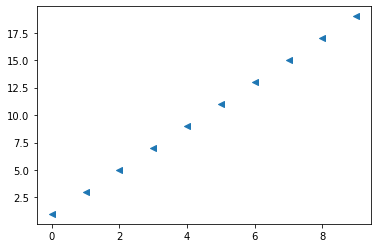

In [10]:
x = np.arange(10)
y = np.arange(1, 20, 2)
plt.scatter(x, y, marker='<')

#### Example 5. 넘파이 배열 산점도 그리기

- Use `marker = v` and `color = red`. 

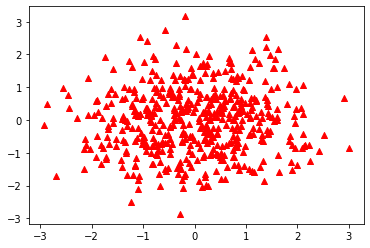

In [11]:
x = np.random.randn(500)
y = np.random.randn(500)
plt.scatter(x, y, marker='^', color='r')

#### Example 6.  sine wave  (from 0 to 2 pi)

다음 코드 셀의 첫줄은 linspace()함수를 사용하여, 0 부터 일정한 간격을 가진 숫자들로 x 좌표의 배열을 생성합니다. 

- 둘째 줄에서 각 x 좌표에 대한 sin() 함수의 y 좌표 값을 구하도록 None을 수정하십시오.  
- 그러면, 주어진 x, y 값으로 sine curve를 그려냅니다. 

In [ ]:
x = None
y = None
plt.plot(x, y)

#### Example 7. 

`np.log(x)`함수의 그래프($0 < x < 2 $)를 그려서, `np.log(0)`가 negative infinity에 수렴하고 있는 것을 관찰하십시오. 

In [ ]:
x = None
y = None
plt.grid(True)
plt.plot(x, y)

#### Example 8. 

`np.exp(x)`함수의 그래프($ -5 < x < 1)$를 그려서, np.exp()의 x가 negative로 커질 때의 수렴하는 값을 관찰하십시오. 

In [ ]:
x = None
y = None
plt.grid(True)
plt.plot(x, y)

## 학습 정리

1. 넘파이의 특징
2. 왜 넘파이인가? 
3. 배열의 속성
4. 배열의 생성과 출력

### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp
- [astroML](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html) 
- Python Numpy Tutorial - http://cs231n.github.io/
- 김태완 블로그: [파이썬 데이터 사이언스 Cheat Sheet](http://taewan.kim/post/numpy_cheat_sheet/)